In [1]:
import pandas as pd
import matplotlib
# import plotly.express as px
import matplotlib.pyplot as plt

In [25]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

mass_x (29,) mass_y (29,)


<Figure size 360x288 with 0 Axes>

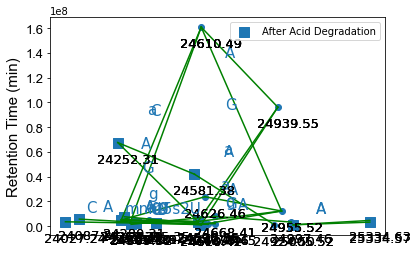

In [11]:
df_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligossample1.xlsx')
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
df = thermo_df(df)
df_noad = thermo_df(df_noad)
df_noad.shape, df.shape
df_25k_noad = df_noad[(df_noad.Mass > 2.3E4) & (df_noad.Mass < 2.6E4) & (df_noad.Vol > 1E6)] # & (df_noad.Vol > 2E5) 
df_25k = df[(df.Mass > 2.3E4) & (df.Mass < 3E4) & (df.Vol > 1E6)] #  
df_25k_noad.shape, df_25k.shape

df_a = df_25k_noad.copy()
df_b = df_25k.copy()
df_a['isAD'] = False
df_b['isAD'] = True
df_merge = pd.concat([df_a, df_b])

bcr = base_calling_random(df_merge) #, acid_labile=True
# print(bcr)
plt, fig = plot_basecalling3(*bcr, y='Vol')

pre = df_a[df_a.Mass.isin(bcr[0].Mass)]
post = df_b[df_b.Mass.isin(bcr[0].Mass)]
# plt.scatter(pre.Mass, pre.Vol, marker='o', s=100, color='C0', label='Before Acid Degradation')
plt.scatter(post.Mass, post.Vol, marker='s', s=90, color='C0', label='After Acid Degradation')
plotly_zone(post, y='Vol')
plt.legend()
# df_pairs = bcr2df(bcr[1])
# output(plt, fig, 'homology_acid_labile')

No handles with labels found to put in legend.


mass_x (5,) mass_y (5,)
[(24581.380920434, 24252.3110919712, 'A (329.05)'), (24597.3533080084, 24268.3037773893, 'A (329.05)'), (24280.3055005283, 24252.3110919712, '2Me (14.01)')]


<Figure size 360x288 with 0 Axes>

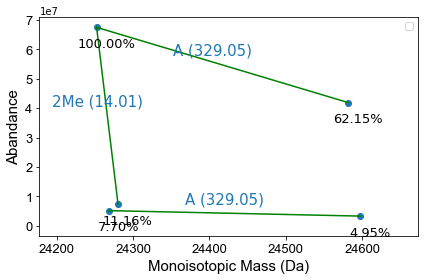

In [42]:
# Fig 2 Homology
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/Fig5_homology.xlsx')
# plotly_zone(df, y='Vol')
bcr = base_calling_random(df, homology=True)
print(bcr[1])
plt, fig = plot_basecalling3(df, bcr[1], y='Vol', annotate=True)
# plt.scatter(df.Mass, df.Vol, marker='o', s=100, color='C0')
# plt.scatter(df.Mass, df.Vol, marker='o', s=100, color='b')
plt.scatter(24200, 20000, color='white')
plt.scatter(24650, 20000, marker='o', s=100, color='white')
plt.legend()
output(plt, fig, 'homology_ad')

In [16]:
# post.to_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/Fig5_homology.xlsx')

In [41]:
def plot_basecalling3(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(5, 4))
    fig, ax = plt.subplots(1)
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Abandance', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    
#     plt.ylabel('')
#     ax.xaxis.set_visible(False)
#     ax.yaxis.set_visible(False)
    vol_max = df.Vol.max()
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}%'.format(100*row.Vol/vol_max)
        plt.scatter(x_pos, y_pos, color='C0')
        plt.annotate(text=mass, size=13, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair[y], 'green')
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
        plt.annotate(text=t[2], size=15, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
#         plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
#         mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
#         plt.annotate(text=mass, size=13, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
#         plt.annotate(text=mass, size=13, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [33]:
def output(plt, fig, svg_name, transparent=True):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig5/{svg_name}.svg', dpi=300, transparent=transparent)

